In [1]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read enrichment results
df = pd.read_csv('/home/jiguo/SeqAna_Pipe/GO_analysis_all.csv')

In [2]:
df

,Category,Term,Genes,Count,List Total,Pop Hits,Pop Total,P-Value,Benjamini,Fold Enrichment,Bonferroni,FDR,Fisher Exact
0,GOTERM_BP_DIRECT,regulation of actin filament polymerization,2.94%,2,67,31,19512,9.980000e-02,1.000000,18.79,1.000000,0.998000,5.070000e-03
1,GOTERM_MF_DIRECT,"ATP-dependent activity, acting on DNA",2.94%,2,66,31,19272,9.950000e-02,1.000000,18.84,1.000000,1.000000,5.040000e-03
2,KEGG_PATHWAY,Pathways in cancer,8.82%,6,45,533,9496,9.850000e-02,0.817000,2.38,1.000000,0.799000,3.850000e-02
3,GOTERM_BP_DIRECT,response to steroid hormone,2.94%,2,67,30,19512,9.670000e-02,1.000000,19.41,1.000000,0.998000,4.750000e-03
4,GOTERM_BP_DIRECT,actomyosin structure organization,2.94%,2,67,30,19512,9.670000e-02,1.000000,19.41,1.000000,0.998000,4.750000e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,UP_KW_DISEASE,Leber hereditary optic neuropathy,5.88%,4,32,13,4888,6.330000e-05,0.002280,47.00,0.002280,0.002280,1.040000e-06
171,KEGG_PATHWAY,ECM-receptor interaction,8.82%,6,45,89,9496,5.260000e-05,0.007410,14.23,0.007390,0.007260,3.470000e-06
172,GOTERM_CC_DIRECT,extracellular space,26.47%,18,66,1895,20808,5.090000e-05,0.002880,2.99,0.008620,0.002750,1.660000e-05
173,GOTERM_CC_DIRECT,extracellular matrix,16.18%,11,66,492,20808,2.780000e-06,0.000237,7.05,0.000473,0.000225,3.840000e-07


In [ ]:
print(f"\nTop 10 most enriched terms (by Count):")
print(df.nsmallest(10, 'FDR')[['Term', 'Count', 'P-Value', 'Fold Enrichment', 'FDR']])


Top 10 most enriched terms (by Count):
                                  Term  Count       P-Value  Fold Enrichment  \
174                  basement membrane      7  7.820000e-07            21.64   
173               extracellular matrix     11  2.780000e-06             7.05   
170  Leber hereditary optic neuropathy      4  6.330000e-05            47.00   
172                extracellular space     18  5.090000e-05             2.99   
171           ECM-receptor interaction      6  5.260000e-05            14.23   
167               extracellular region     20  4.120000e-04             2.34   
162                      Actin-binding      7  9.140000e-04             5.99   
150               Extracellular matrix      6  2.720000e-03             6.14   
151                           Secreted     17  2.710000e-03             2.20   
149                             Signal     24  3.770000e-03             1.69   

          FDR  
174  0.000127  
173  0.000225  
170  0.002280  
172  0.002750  

In [4]:
# only keep top 10 most enriched terms for visualization
top_terms = df.nsmallest(10, 'FDR').copy()

In [5]:
top_terms

,Category,Term,Genes,Count,List Total,Pop Hits,Pop Total,P-Value,Benjamini,Fold Enrichment,Bonferroni,FDR,Fisher Exact
174,GOTERM_CC_DIRECT,basement membrane,10.29%,7,66,102,20808,7.820000e-07,0.000133,21.64,0.000133,0.000127,3.390000e-08
173,GOTERM_CC_DIRECT,extracellular matrix,16.18%,11,66,492,20808,2.780000e-06,0.000237,7.05,0.000473,0.000225,3.840000e-07
170,UP_KW_DISEASE,Leber hereditary optic neuropathy,5.88%,4,32,13,4888,6.330000e-05,0.002280,47.00,0.002280,0.002280,1.040000e-06
172,GOTERM_CC_DIRECT,extracellular space,26.47%,18,66,1895,20808,5.090000e-05,0.002880,2.99,0.008620,0.002750,1.660000e-05
171,KEGG_PATHWAY,ECM-receptor interaction,8.82%,6,45,89,9496,5.260000e-05,0.007410,14.23,0.007390,0.007260,3.470000e-06
167,GOTERM_CC_DIRECT,extracellular region,29.41%,20,66,2693,20808,4.120000e-04,0.017500,2.34,0.067600,0.016700,1.710000e-04
162,UP_KW_MOLECULAR_FUNCTION,Actin-binding,10.29%,7,47,300,12059,9.140000e-04,0.035600,5.99,0.035000,0.035600,1.470000e-04
150,UP_KW_CELLULAR_COMPONENT,Extracellular matrix,8.82%,6,63,282,18195,2.720000e-03,0.039400,6.14,0.075900,0.038000,4.260000e-04
151,UP_KW_CELLULAR_COMPONENT,Secreted,25.00%,17,63,2233,18195,2.710000e-03,0.039400,2.20,0.075600,0.038000,1.190000e-03
149,UP_KW_DOMAIN,Signal,35.29%,24,47,4426,14656,3.770000e-03,0.049000,1.69,0.047900,0.049000,2.170000e-03


/tmp/6778993/ipykernel_3136905/238636099.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=top_terms, y='Term', x='Count', ax=ax, palette=colors)
/tmp/6778993/ipykernel_3136905/238636099.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(data=top_terms, y='Term', x='Count', ax=ax, palette=colors)


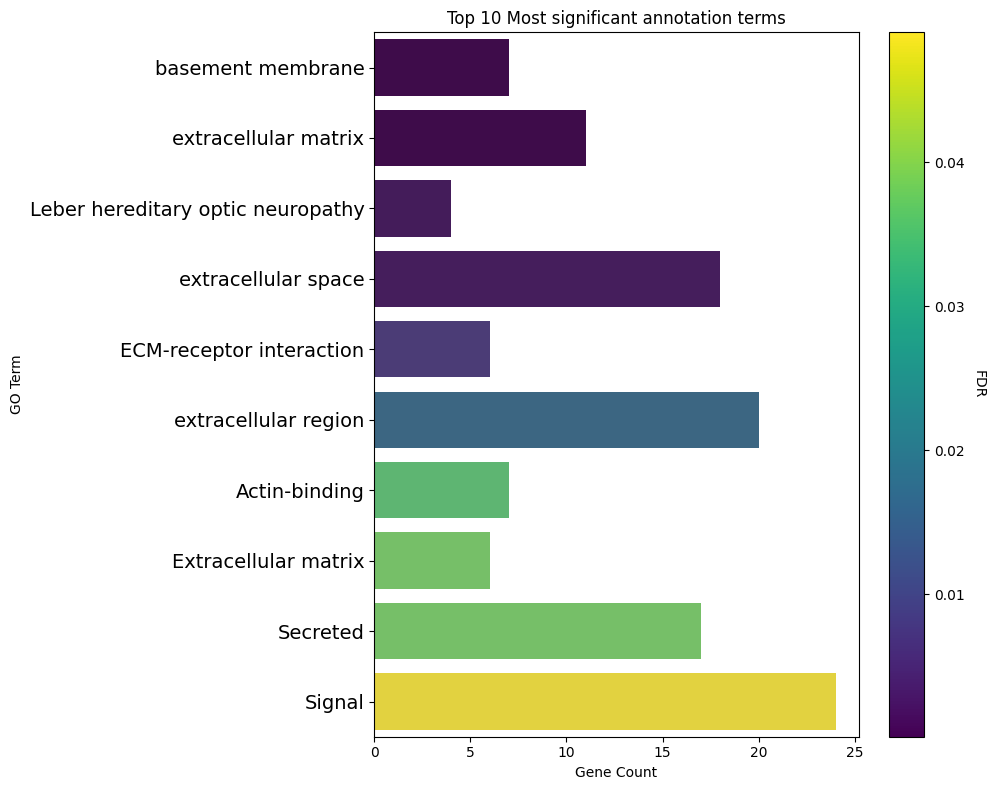

In [6]:
# plot the all significant terms after filtering
# Create a color list for each bar based on FDR
norm = plt.Normalize(top_terms['FDR'].min(), top_terms['FDR'].max())
colors = plt.cm.viridis(norm(top_terms['FDR'].values))

fig, ax = plt.subplots(figsize=(10, 8))
bars = sns.barplot(data=top_terms, y='Term', x='Count', ax=ax, palette=colors)

# Add colorbar for FDR
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('FDR', rotation=270, labelpad=15)

plt.title('Top 10 Most significant annotation terms')
plt.xlabel('Gene Count')
plt.ylabel('GO Term')
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [7]:
df = pd.read_csv('/home/jiguo/SeqAna_Pipe/14_genes_GOanalysis.csv')
print(f"\nTop 10 most enriched terms (by Count):")
print(df.nsmallest(10, 'FDR')[['Term', 'Count', 'P-Value', 'Fold Enrichment', 'FDR']])


Top 10 most enriched terms (by Count):
                            Term  Count   P-Value  Fold Enrichment      FDR
1            extracellular space      8  0.000054             6.27  0.00221
2                  Mitochondrion      7  0.000222             6.48  0.00333
3   mitochondrial inner membrane      5  0.000230            14.29  0.00472
5         mitochondrial membrane      4  0.000433            24.07  0.00472
6                  mitochondrion      7  0.000460             5.68  0.00472
9    endoplasmic reticulum lumen      4  0.000936            18.46  0.00767
4                   Angiogenesis      4  0.000293            26.68  0.00820
0          response to hyperoxia      3  0.000043           278.74  0.00895
11                        Signal      9  0.001660             2.71  0.00998
12             basement membrane      3  0.001790            43.71  0.01220


In [8]:
print(f"\nTop 10 most enriched terms (by FDR):")
print(df.nsmallest(10, 'FDR')[['Term', 'Count', 'P-Value', 'Fold Enrichment', 'FDR']])


Top 10 most enriched terms (by FDR):
                            Term  Count   P-Value  Fold Enrichment      FDR
1            extracellular space      8  0.000054             6.27  0.00221
2                  Mitochondrion      7  0.000222             6.48  0.00333
3   mitochondrial inner membrane      5  0.000230            14.29  0.00472
5         mitochondrial membrane      4  0.000433            24.07  0.00472
6                  mitochondrion      7  0.000460             5.68  0.00472
9    endoplasmic reticulum lumen      4  0.000936            18.46  0.00767
4                   Angiogenesis      4  0.000293            26.68  0.00820
0          response to hyperoxia      3  0.000043           278.74  0.00895
11                        Signal      9  0.001660             2.71  0.00998
12             basement membrane      3  0.001790            43.71  0.01220


In [9]:
# only keep top 10 most enriched terms for visualization
top_terms = df.nsmallest(10, 'FDR').copy()

/tmp/6778993/ipykernel_3136905/238636099.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=top_terms, y='Term', x='Count', ax=ax, palette=colors)
/tmp/6778993/ipykernel_3136905/238636099.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  bars = sns.barplot(data=top_terms, y='Term', x='Count', ax=ax, palette=colors)


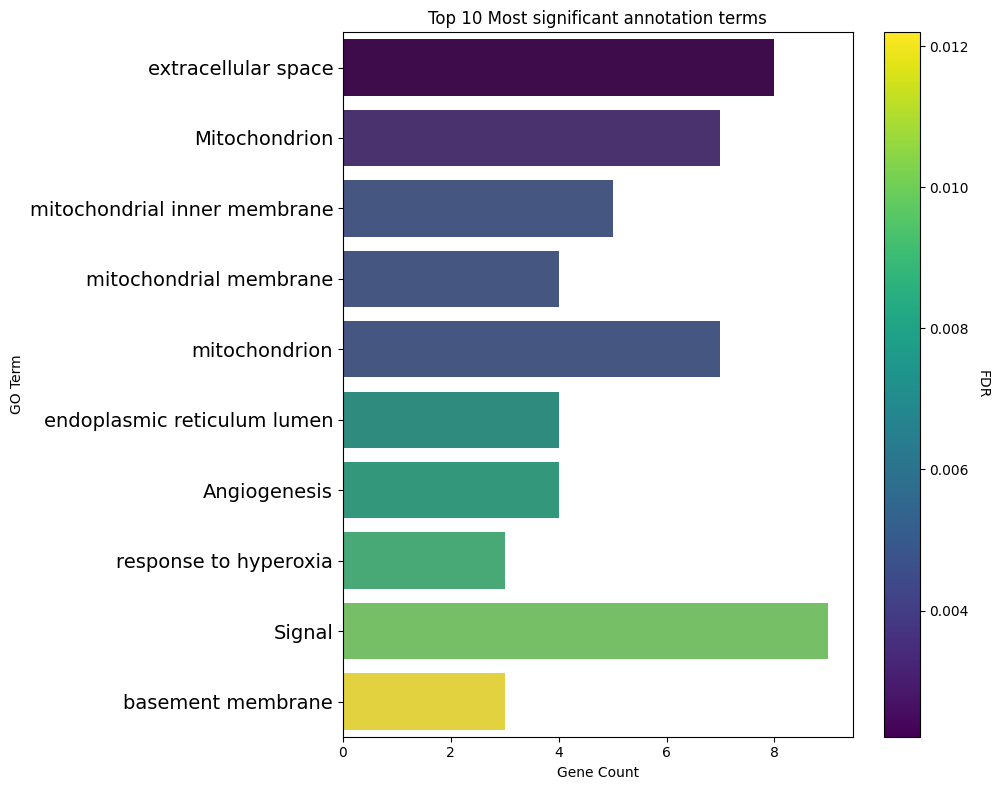

In [10]:
# plot the all significant terms after filtering
# Create a color list for each bar based on FDR
norm = plt.Normalize(top_terms['FDR'].min(), top_terms['FDR'].max())
colors = plt.cm.viridis(norm(top_terms['FDR'].values))

fig, ax = plt.subplots(figsize=(10, 8))
bars = sns.barplot(data=top_terms, y='Term', x='Count', ax=ax, palette=colors)

# Add colorbar for FDR
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('FDR', rotation=270, labelpad=15)

plt.title('Top 10 Most significant annotation terms')
plt.xlabel('Gene Count')
plt.ylabel('GO Term')
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
df = pd.read_csv('/home/jiguo/SeqAna_Pipe/top100_pc4_genes_GOanalysis.csv')
print(f"\nTop 10 most enriched terms (by FDR):")
print(df.nsmallest(10, 'FDR')[['Term', 'Count', 'P-Value', 'Fold Enrichment', 'FDR']])


Top 10 most enriched terms (by FDR):
                                                 Term  Count       P-Value  \
0                   Leber hereditary optic neuropathy      7  2.030000e-10   
1                           Oxidative phosphorylation      9  1.110000e-06   
3                       Amyotrophic lateral sclerosis     12  7.100000e-06   
4                                  Huntington disease     11  9.700000e-06   
7                             Diabetic cardiomyopathy      9  2.100000e-05   
8                                   Parkinson disease     10  2.210000e-05   
9                                       Prion disease     10  2.710000e-05   
6                                   Respiratory chain      6  1.770000e-05   
14                                         Ubiquinone      5  5.590000e-05   
11  Chemical carcinogenesis - reactive oxygen species      9  4.360000e-05   

    Fold Enrichment           FDR  
0             69.26  7.730000e-09  
1             11.06  1.520000e-